In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy

We are solving the following differential equation - 

$$\frac{dy(t)}{dt} = -ky(t)$$

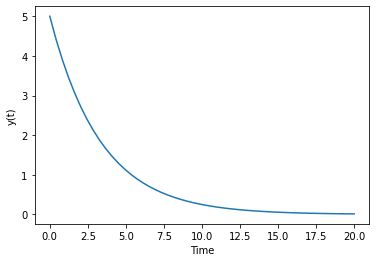

In [47]:
def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt

y0 = 5 #initial condition

t = np.linspace(0, 20)

y = odeint(model, y0, t)

plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.show()

Now, what if you don't know the value of $k$ either?

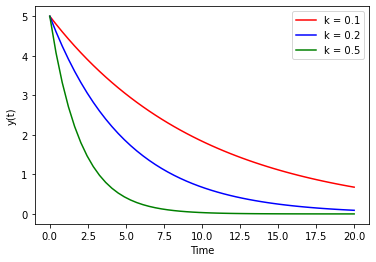

In [48]:
def model(y, t, k):
    dydt = -k * y
    return dydt

y0 = 5 #initial condition

t = np.linspace(0, 20)

k = 0.1
y1 = odeint(model, y0, t, args=(k,))

k = 0.2
y2 = odeint(model, y0, t, args=(k,))

k = 0.5
y3 = odeint(model, y0, t, args=(k,))

plt.plot(t, y1, color='red', label='k = 0.1')
plt.plot(t, y2, color='blue', label='k = 0.2')
plt.plot(t, y3, color='green', label='k = 0.5')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend(loc='best')

### Problem 1

$$\frac{dy(t)}{dt} = -y(t) + 1$$
$$y(0) = 0$$

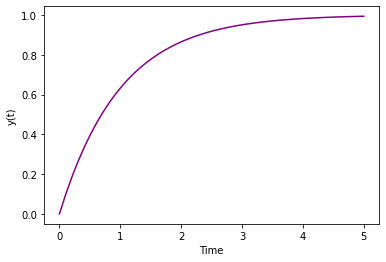

In [49]:
def model(y, t):
    dydt = (-1 * y) + 1
    return dydt

y0 = 0

t = np.linspace(0, 5)

y = odeint(model, y0, t)

plt.plot(t, y, color='purple')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.show()

### Problem 2

$$5\frac{dy(t)}{dt} = -y(t) + u(t)$$
$$y(0) = 1$$
<br>
<center>$u$ steps from $0$ to $2$ at $t = 10$</center>

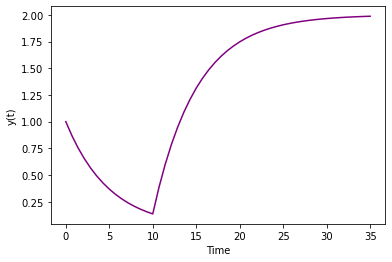

In [50]:
def model(y, t):
    if t < 10:
        u = 0
    else:
        u = 2
    dydt = (u - y) / 5
    return dydt

y0 = 1

t = np.linspace(0, 35)

y = odeint(model, y0, t)

plt.plot(t, y, color='purple')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.show()

### Problem 3

$$\frac{dx(t)}{dt} = 3e^{-t}$$

$$\frac{dy(t)}{dt} = 3 - y(t)$$

$$x(0) = 0$$

$$y(0) = 0$$

Text(0, 0.5, 'x(t), y(t)')

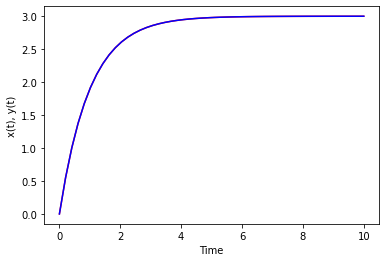

In [51]:
def model_one(z, t):
    x = z[0]
    y = z[1]
    dxdt = 3 * np.exp(-t)
    dydt = 3 - y
    return [dxdt, dydt]

z0 = [0, 0]

t = np.linspace(0, 10)

z = odeint(model_one, z0, t)

x = z[:,0]
y = z[:,1]

plt.plot(t, x, color='red')
plt.plot(t, y, color='blue')
plt.xlabel('Time')
plt.ylabel('x(t), y(t)')

$$2\frac{dx(t)}{dt} = -x(t) + u(t)$$

$$5\frac{dy(t)}{dt} = -y(t) + x(t)$$

$$u = 2S(t-5), x(0) = 0, y(0) = 0$$
<br>
<center>$S(t-5)$ steps from $0$ to $1$ at $t = 5$</center>

Text(0, 0.5, 'x(t), y(t)')

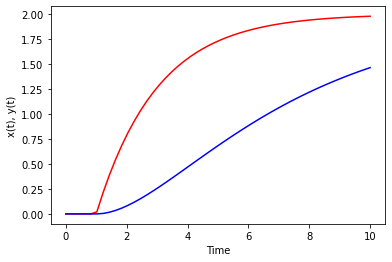

In [52]:
def model(z, t):
    if t < 1.0:
        u = 0
    else:
        u = 2
        
    x = z[0]
    y = z[1]
    dxdt = (-x + u) / 2
    dydt = (-y + x) / 5
    return [dxdt, dydt]

z0 = [0, 0]

t = np.linspace(0, 10)

z = odeint(model, z0, t)

x = z[:,0]
y = z[:,1]

plt.plot(t, x, color='red')
plt.plot(t, y, color='blue')
plt.xlabel('Time')
plt.ylabel('x(t), y(t)')

### Flavour Eigenbasis
$$\frac{d\nu_e}{dx} = \frac{i\omega}{2}(-\nu_e\cos{2\theta_{\nu}} + \nu_{\chi}\sin{2\theta_{\nu}})$$
<br>
$$\frac{d\nu_\chi}{dx} = \frac{i\omega}{2}(\nu_\chi\cos{2\theta_{\nu}} + \nu_{e}\sin{2\theta_{\nu}})$$

Text(0, 0.5, '$P_{e}(x), P_{\\mu}(x)$')

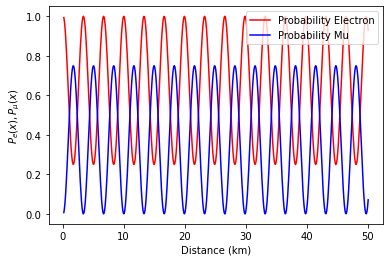

In [53]:
# First try : just solve above differential equations and plot probability vs. distance (fixed energy)
iota = 0 + 1j
energy = 10 * (10 ** 6) #MeV
omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
#omega = 1
theta = np.pi / 6
cos_two_theta = np.cos(2 * theta)
sin_two_theta = np.sin(2 * theta)
y_0 = [1 + 0j, 0 + 0j]

def f(t, y):
    return [((iota * omega) / 2) * ((-1 * y[0] * cos_two_theta) + (y[1] * sin_two_theta)), ((iota * omega) / 2) * ((y[0] * sin_two_theta) + (y[1] * cos_two_theta))]

r = scipy.integrate.ode(f).set_integrator('zvode', method='bdf')
r.set_initial_value(y_0)

t1 = 50
dt = 0.1
amplitude = []
x = []
while r.successful() and r.t < t1:
    thing = r.integrate(r.t + dt)
    #print(r.t + dt, thing)
    amplitude.append(thing)
    x.append(r.t + dt)

amplitude = np.array(amplitude)
v_e = amplitude[:, 0]
v_mu = amplitude[:, 1]
p_e = v_e.conjugate() * v_e
p_mu = v_mu.conjugate() * v_mu

plt.plot(np.array(x), np.abs(p_e), color='red', label='Probability Electron')
plt.plot(np.array(x), np.abs(p_mu), color='blue', label='Probability Mu')
plt.xlabel('Distance (km)')
plt.legend(loc='upper right')
plt.ylabel(r'$P_{e}(x), P_{\mu}(x)$')
#plt.xlim(0, 100)

Text(0, 0.5, '$P_{e}(x), P_{\\mu}(x)$')

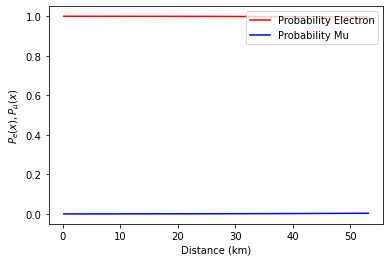

In [54]:
# Changing value of omega and trying to match with analytical solution
omega = ((10 ** (-5)) / (2 * energy)) * 0.5 * (10 ** 10)
theta = (33 * np.pi) / 180

r = scipy.integrate.ode(f).set_integrator('zvode', method='bdf')
r.set_initial_value(y_0)

t1 = 53
dt = 0.1
amplitude = []
x = []
while r.successful() and r.t < t1:
    thing = r.integrate(r.t + dt)
    #print(r.t + dt, thing)
    amplitude.append(thing)
    x.append(r.t + dt)

amplitude = np.array(amplitude)
v_e = amplitude[:, 0]
v_mu = amplitude[:, 1]
p_e = v_e.conjugate() * v_e
p_mu = v_mu.conjugate() * v_mu

plt.plot(np.array(x), np.abs(p_e), color='red', label='Probability Electron')
plt.plot(np.array(x), np.abs(p_mu), color='blue', label='Probability Mu')
plt.xlabel('Distance (km)')
plt.legend(loc='upper right')
plt.ylabel(r'$P_{e}(x), P_{\mu}(x)$')
#plt.xlim(0, 100)

/Users/abhayagarwal/anaconda3/envs/tflow/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/abhayagarwal/anaconda3/envs/tflow/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


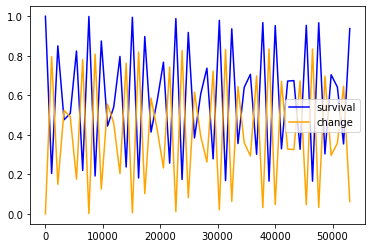

In [55]:
#Analytical solution
x = np.linspace(0, 53000)
prob_amp = ((np.cos(theta) ** 2) * np.exp(-iota * omega * x)) + (np.sin(theta) ** 2)
prob = prob_amp.conjugate() * prob_amp
plt.plot(x, prob, color='blue', label='survival')
plt.plot(x, 1 - prob, color='orange', label='change')
plt.legend(loc='best')

/Users/abhayagarwal/anaconda3/envs/tflow/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/abhayagarwal/anaconda3/envs/tflow/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Neutrino Oscillation Probability vs. Energy')

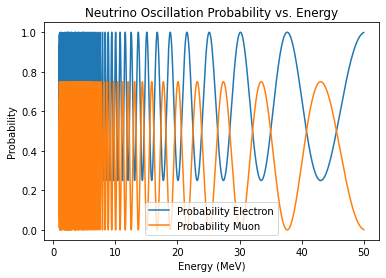

In [57]:
# Fixing distance = 50 km and plotting probability vs. energy

def solve_neutrino_oscillation(energy, theta):
    '''Solve the differential equation using the value of energy that is inputted;
    Enter energy in eV; returns an array containing the numpy arrays x, p_e, p_mu'''
    
    energy = energy
    omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
    #omega = 1
    theta = theta
    cos_two_theta = np.cos(2 * theta)
    sin_two_theta = np.sin(2 * theta)
    y_0 = [1 + 0j, 0 + 0j]

    def f(t, y):
        return [((iota * omega) / 2) * ((-1 * y[0] * cos_two_theta) + (y[1] * sin_two_theta)), ((iota * omega) / 2) * ((y[0] * sin_two_theta) + (y[1] * cos_two_theta))]

    r = scipy.integrate.ode(f).set_integrator('zvode', method='bdf')
    r.set_initial_value(y_0)

    t1 = 50
    dt = 0.1
    amplitude = []
    x = []
    while r.successful() and r.t < t1:
        thing = r.integrate(r.t + dt)
        #print(r.t + dt, thing)
        amplitude.append(thing)
        x.append(r.t + dt)

    amplitude = np.array(amplitude)
    v_e = amplitude[:, 0]
    v_mu = amplitude[:, 1]
    p_e = v_e.conjugate() * v_e
    p_mu = v_mu.conjugate() * v_mu
    
    return np.array(x), p_e, p_mu

energies = np.linspace(1, 50, 10000) * (10 ** 6) #eV
prob_e = []
prob_mu = []

for energy_val in energies:
    distances, p_e, p_mu = solve_neutrino_oscillation(energy_val, np.pi / 6)
    prob_e.append(p_e[-2]) #Using the -2 index because I know that index has value of 50 km in distances array
    prob_mu.append(p_mu[-2])

plt.plot(energies * (10 ** (-6)), prob_e, label='Probability Electron')
plt.plot(energies * (10 ** (-6)), prob_mu, label='Probability Muon')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.title('Neutrino Oscillation Probability vs. Energy')

### Mass Eigenbasis
$$\frac{d\nu_1}{dx} = \frac{i\omega}{2}\nu_1$$
<br>
$$\frac{d\nu_2}{dx} = -\frac{i\omega}{2}\nu_2$$